In [1]:
import pandas as pd
import numpy as np

In [41]:
data = pd.read_csv('C:/Temp/data_all.csv', encoding='euc-kr', parse_dates=['일시'])

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640647 entries, 0 to 640646
Data columns (total 20 columns):
지점               640647 non-null object
발신지_시도           640647 non-null object
발신지_읍면동          640647 non-null object
성별               640647 non-null object
연령               640647 non-null object
요일               640647 non-null object
일시               640647 non-null datetime64[ns]
통화건수             640647 non-null int64
평균기온(°C)         636478 non-null float64
최저기온(°C)         636917 non-null float64
최고기온(°C)         636917 non-null float64
일강수량(mm)         640346 non-null float64
최대 순간 풍속(m/s)    609859 non-null float64
평균 풍속(m/s)       635429 non-null float64
이산화질소농도(ppm)     533113 non-null float64
오존농도(ppm)        533088 non-null float64
이산화탄소농도(ppm)     533255 non-null float64
아황산가스(ppm)       532297 non-null float64
미세먼지(㎍/㎥)        533373 non-null float64
초미세먼지(㎍/㎥)       533375 non-null float64
dtypes: datetime64[ns](1), float64(12), int64(1), object(6)
memory usa

In [43]:
data = data.groupby([data['일시'],data['요일'], data['지점'],data["성별"],data["연령"]]).mean()
data.reset_index(inplace=True)

In [44]:
np.sum(pd.isnull(data))

일시                   0
요일                   0
지점                   0
성별                   0
연령                   0
통화건수                 0
평균기온(°C)           685
최저기온(°C)           569
최고기온(°C)           569
일강수량(mm)            43
최대 순간 풍속(m/s)     4806
평균 풍속(m/s)         616
이산화질소농도(ppm)     18012
오존농도(ppm)        17953
이산화탄소농도(ppm)     17922
아황산가스(ppm)       18134
미세먼지(㎍/㎥)        17847
초미세먼지(㎍/㎥)       17839
dtype: int64

In [45]:
data.drop(['최대 순간 풍속(m/s)','이산화질소농도(ppm)','오존농도(ppm)','이산화탄소농도(ppm)','아황산가스(ppm)','초미세먼지(㎍/㎥)'], axis='columns', inplace=True)

In [46]:
data = data.interpolate() 

In [47]:
np.sum(pd.isnull(data))

일시            0
요일            0
지점            0
성별            0
연령            0
통화건수          0
평균기온(°C)      0
최저기온(°C)      0
최고기온(°C)      0
일강수량(mm)      0
평균 풍속(m/s)    0
미세먼지(㎍/㎥)     0
dtype: int64

In [48]:
data["일교차"] = data["최고기온(°C)"] -data["최저기온(°C)"] 

In [49]:
data.rename(columns={'지점': "GU", '일시':"Date",'요일':"Week",'통화건수':"call",'평균기온(°C)':"temp",'최저기온(°C)':"temp_L",'최고기온(°C)':"temp_H",'일강수량(mm)':"rain",'평균 풍속(m/s)':"wind",'일교차(°C)':"temp_dif",'미세먼지(㎍/㎥)':"dust",'일교차':"temp_dif",'성별':"gender",'연령':"age"}, inplace=True)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107215 entries, 0 to 107214
Data columns (total 13 columns):
Date        107215 non-null datetime64[ns]
Week        107215 non-null object
GU          107215 non-null object
gender      107215 non-null object
age         107215 non-null object
call        107215 non-null float64
temp        107215 non-null float64
temp_L      107215 non-null float64
temp_H      107215 non-null float64
rain        107215 non-null float64
wind        107215 non-null float64
dust        107215 non-null float64
temp_dif    107215 non-null float64
dtypes: datetime64[ns](1), float64(8), object(4)
memory usage: 10.6+ MB


In [51]:
data.head()

,Date,Week,GU,gender,age,call,temp,temp_L,temp_H,rain,wind,dust,temp_dif
0,2017-12-01,금,강남구,남,10대,8.142857,-1.1,-5.0,3.1,0.0,1.5,20.0,8.1
1,2017-12-01,금,강남구,남,20대,39.100000,-1.1,-5.0,3.1,0.0,1.5,20.0,8.1
2,2017-12-01,금,강남구,남,30대,67.100000,-1.1,-5.0,3.1,0.0,1.5,20.0,8.1
3,2017-12-01,금,강남구,남,40대,62.300000,-1.1,-5.0,3.1,0.0,1.5,20.0,8.1
4,2017-12-01,금,강남구,남,50대,43.818182,-1.1,-5.0,3.1,0.0,1.5,20.0,8.1


In [52]:
data["mean"] = data.groupby(["GU"])["call"].transform('mean')
data["call_num"] = np.where(data["call"]>data["mean"],1,0)

In [53]:
data.head()

,Date,Week,GU,gender,age,call,temp,temp_L,temp_H,rain,wind,dust,temp_dif,mean,call_num
0,2017-12-01,금,강남구,남,10대,8.142857,-1.1,-5.0,3.1,0.0,1.5,20.0,8.1,48.678871,0
1,2017-12-01,금,강남구,남,20대,39.100000,-1.1,-5.0,3.1,0.0,1.5,20.0,8.1,48.678871,0
2,2017-12-01,금,강남구,남,30대,67.100000,-1.1,-5.0,3.1,0.0,1.5,20.0,8.1,48.678871,1
3,2017-12-01,금,강남구,남,40대,62.300000,-1.1,-5.0,3.1,0.0,1.5,20.0,8.1,48.678871,1
4,2017-12-01,금,강남구,남,50대,43.818182,-1.1,-5.0,3.1,0.0,1.5,20.0,8.1,48.678871,0


In [54]:
data.to_csv('FINAL_DATA.csv', encoding='cp949')

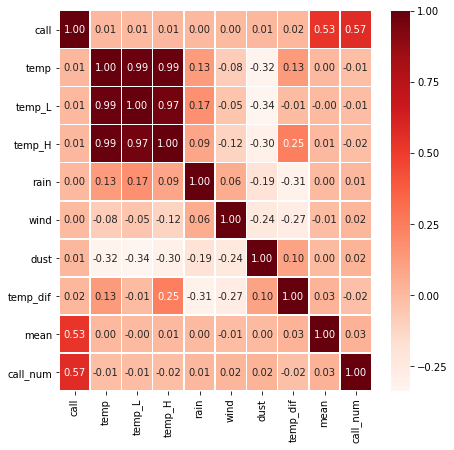

In [58]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn as sns  
plt.figure(figsize=(7,7))
sns.heatmap(data = data.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Reds')